In [8]:
import numpy as np # linear algebra
import pandas as pd # to read csv file
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from IPython.display import Image, display
from matplotlib.ticker import MaxNLocator
#from fbprophet import Prophet
import squarify

In [4]:
import sys

In [7]:
!{sys.executable} -m pip install squarify

In [13]:
!{sys.executable} -m pip install plotly.tools

ERROR: Could not find a version that satisfies the requirement plotly.tools (from versions: none)
ERROR: No matching distribution found for plotly.tools


In [14]:
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')

In [15]:
StateTimeSeries=pd.read_csv("/home/vno/Downloads/State_time_series(1).csv",parse_dates=True)
StateTimeSeries.Date=pd.to_datetime(StateTimeSeries.Date)
StateTimeSeries['year'] = StateTimeSeries.Date.dt.year
print(StateTimeSeries.head())

        Date  RegionName  DaysOnZillow_AllHomes  \
0 1996-04-30     Alabama                    NaN   
1 1996-04-30     Arizona                    NaN   
2 1996-04-30    Arkansas                    NaN   
3 1996-04-30  California                    NaN   
4 1996-04-30    Colorado                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                            

In [16]:
states = set(StateTimeSeries[~StateTimeSeries['ZHVI_AllHomes'].isnull() &
    ~StateTimeSeries['Sale_Prices'].isnull()]['RegionName'].values)

In [18]:
states

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'DistrictofColumbia',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Kentucky',
 'Maryland',
 'Massachusetts',
 'Minnesota',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'NewJersey',
 'NewMexico',
 'NewYork',
 'NorthCarolina',
 'NorthDakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'SouthCarolina',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'WestVirginia',
 'Wisconsin',
 'Wyoming'}

Text(0.5, 0, 'Year')

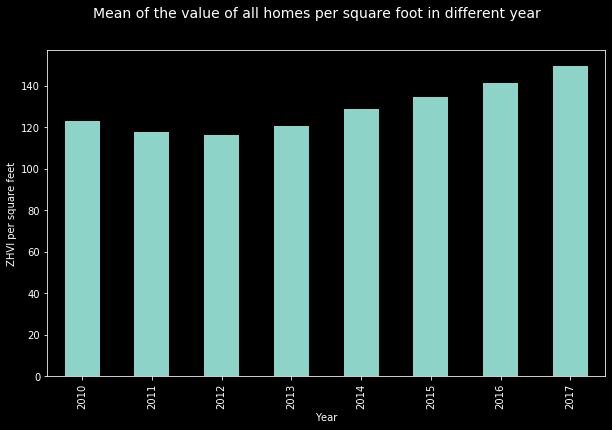

In [23]:
# 1 Here we are plotting a bar chart with values of all houses per square. The numbers are calculated through
# dividing  the estimated home values for each house in given state by house's square footage 
StateTimeSeries.Date = pd.to_datetime(StateTimeSeries.Date)
StateTimeSeries.groupby(StateTimeSeries.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the value of all homes per square foot in different year', fontsize=14)
plt.ylabel('ZHVI per square feet')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

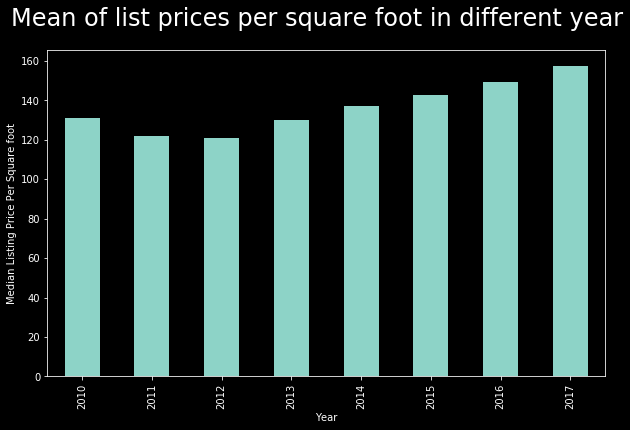

In [24]:
# 2. Here I am plotting a bar chart of median of list prices per square foot in different years. It is calculated by dividing the median of list prices by the square footage of the house. 
# ‘any’ : If any NA values are present, drop that row or column <- dropna

StateTimeSeries = StateTimeSeries.dropna(subset=['MedianListingPricePerSqft_AllHomes'], how='any')
StateTimeSeries.groupby(StateTimeSeries.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of list prices per square foot in different year', fontsize=24)
plt.ylabel('Median Listing Price Per Square foot')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

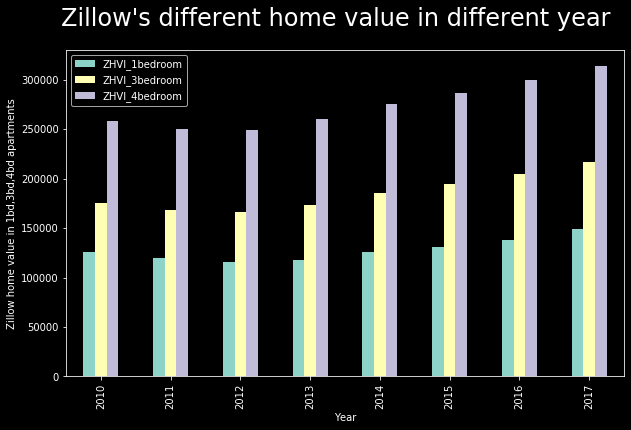

In [26]:
#  3 Here I have plotted a bar chart with three variables: Zillow Home Value for 1 bedroom, 3 bedroom and 4 bedroom. 
# This is a data visualization of zillow’s home values in different years by type of the house. 

StateTimeSeries.groupby(StateTimeSeries.Date.dt.year)[['ZHVI_1bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in 1bd,3bd,4bd apartments')
plt.xlabel('Year')

In [40]:
StateTimeSeriesYear.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year
8226,2010-01-31,Colorado,142.000,46680.0,41554.0,209.737828,157.987127,145.833333,153.846154,173.556327,...,155700.0,215600.0,225100.0,388300.0,NaN,NaN,NaN,NaN,NaN,2010
8229,2010-01-31,DistrictofColumbia,126.000,2128.0,1934.0,424.381351,NaN,NaN,NaN,NaN,...,351500.0,354600.0,366400.0,707500.0,NaN,NaN,NaN,NaN,NaN,2010
8242,2010-01-31,Massachusetts,145.000,37803.0,31014.0,284.615385,203.467332,192.785134,191.610496,157.091562,...,238300.0,297200.0,308200.0,503400.0,NaN,NaN,NaN,NaN,NaN,2010
8269,2010-01-31,Washington,127.000,43796.0,38680.0,275.983437,192.243590,160.395833,156.843604,165.094340,...,221700.0,251100.0,254900.0,426900.0,NaN,NaN,NaN,NaN,NaN,2010
8278,2010-02-28,Colorado,141.875,47015.0,43131.0,209.512195,157.532447,145.530146,153.676471,173.059484,...,157500.0,217400.0,226800.0,389500.0,NaN,NaN,NaN,NaN,NaN,2010


Text(2010, 550000, 'Noticed Increase in house sales prices in past 8 years in US states')

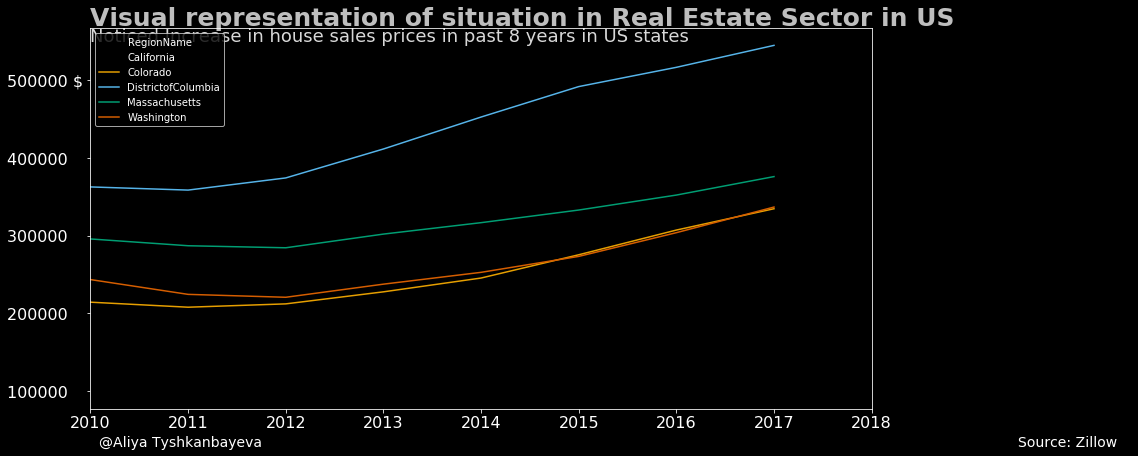

In [50]:
#  4 Here our plot shows how top 5 states by costs behave in past 8 years based on the house sold prices using fte - fivethirtyeight style
StateTimeSeriesYear = StateTimeSeries[StateTimeSeries['RegionName'].isin(states)].copy()
HighestCostStates = StateTimeSeriesYear[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName').max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
StateTimeSeriesYear=StateTimeSeriesYear[StateTimeSeriesYear.RegionName.isin(HighestCostStates)]
StateTimeSeriesYear.year = StateTimeSeriesYear.Date.dt.year


# colorblind friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

StatesyearSalePrices=StateTimeSeriesYear.groupby([StateTimeSeriesYear.year,StateTimeSeriesYear.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=StatesyearSalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(14,7), color=colors, legend=True)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ',  '300000   ', '400000   ',  '500000 $'])
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 2010, right = 2018)
# The signature bar
fte_graph.text(x = 2010, y = 30000,
    s = '  @Aliya Tyshkanbayeva                                                                                                                                                                        Source: Zillow   ',
    fontsize = 14, color = 'white', backgroundcolor = 'black')


# Adding a title and a subtitle
fte_graph.text(x = 2010, y = 570000, s = "Visual representation of situation in Real Estate Sector in US",
               fontsize = 25, weight = 'bold', alpha = .75)
fte_graph.text(x = 2010, y = 550000, 
               s = 'Noticed Increase in house sales prices in past 8 years in US states',
              fontsize = 18, alpha = .85)

# Adding colored labels in order to see the states 
#fte_graph.text(x = 2002, y = 390000, s = 'California', color = 'white', weight = 'bold', rotation = 55,
#              backgroundcolor = 'yellow')
#fte_graph.text(x = 2012, y = 530000, s = 'District of Columbia', color = 'orange', weight = 'bold', rotation = 30,
#              backgroundcolor = 'yellow')
#fte_graph.text(x = 2015, y = 370000, s = 'Hawaii', color = 'blue', weight = 'bold', rotation = 0, 
#               backgroundcolor = 'yellow')
#fte_graph.text(x = 2004, y = 310000, s = 'Massachusetts', color = 'green', weight = 'bold', rotation = 30,
#              backgroundcolor = 'yellow')
#fte_graph.text(x = 2013, y = 220000, s = 'New Jersey', color = 'red', weight = 'bold',  rotation = 15,
#              backgroundcolor = 'yellow');



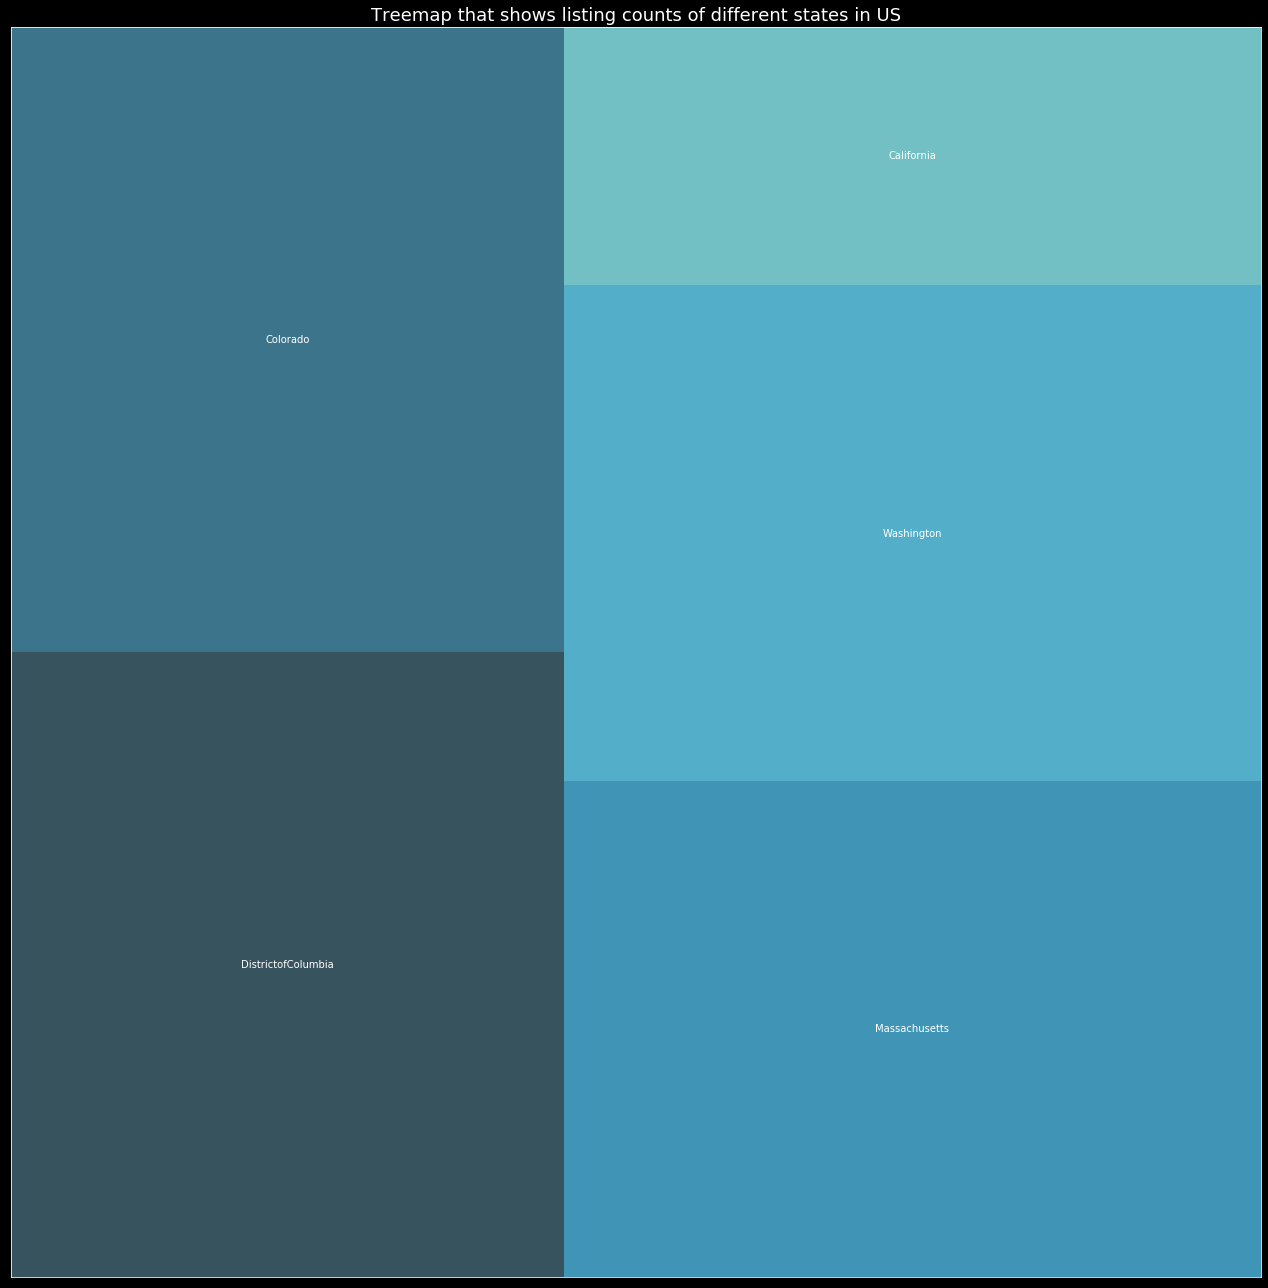

In [38]:
# 6 Plotting a tree map to see how states differentiate based on their house sale counts based on Zillow Data
# Treemap of listing counts for different states in US 
figr = plt.figure(figsize=(10, 10))
regions=StateTimeSeriesYear.RegionName.value_counts().to_frame()
fd = figr.add_subplot(111, aspect="equal")
fd = squarify.plot(sizes=regions['RegionName'].values,label=regions.index,
              color=sns.color_palette("GnBu_d"), alpha=1)
fd.set_xticks([])
fd.set_yticks([])
figr=plt.gcf()
figr.set_size_inches(41,23)
plt.title("Treemap that shows listing counts of different states in US", fontsize=18)
plt.show()